## 1671. Minimum Number of Removals to Make Mountain Array


#### Description:

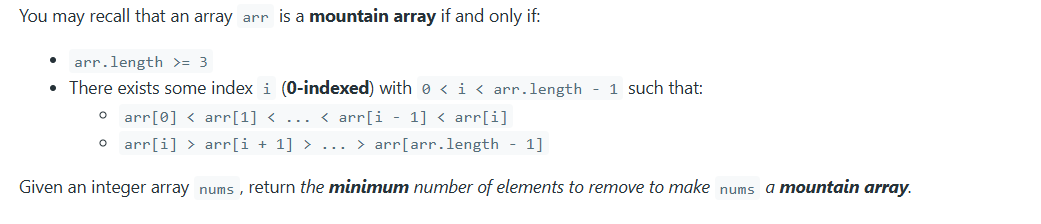